# Анализ закономерностей успешных игр

# Описание данных

Представлены данные до 2016 года. Предполагается, что сейчас декабрь 2016 г., и планируется кампания на 2017-й. Нужно обработать данные и выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать прогноз продаж на 2017 год.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from datetime import datetime
import seaborn as sns

## Общая информация о данных

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<b>Вывод</b>

Мы провели исследование и изучили предоставленную информацию. У нас есть таблица с данными о выпущенных играх, игровых платформах, годах производства, жанрах, продажах в Северной Америке, Европе и Японии, информация об оценках пользователей и критиков, а также рейтинге игр. Мы обнаружили наличие пропусков в данных и также нужно изменить тип некоторых значений. Для удобства обращения к определенным столбцам, мы приведем названия столбцов к нижнему регистру. В следующем этапе мы проведем предварительную обработку данных и на основе имеющейся информации проведем исследование, с целью выявить закономерности, определяющие успешность игры.

## Преодобработка данных

Приведем наименования колонок к нижнему регистру для удобства обращения к ним в дальнейшем.

In [4]:
data.columns = data.columns.str.lower()
data.columns


Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Приведем данные к нужному типу

In [5]:
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y').astype('datetime64[Y]')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16715 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16715 non-null  float64       
 5   eu_sales         16715 non-null  float64       
 6   jp_sales         16715 non-null  float64       
 7   other_sales      16715 non-null  float64       
 8   critic_score     8137 non-null   float64       
 9   user_score       10014 non-null  object        
 10  rating           9949 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 1.4+ MB


In [6]:
data['year_of_release'] = data['year_of_release'].dt.year
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


В колонке "user_score" текущий тип данных является вещественным. Заменим его на числовой.

In [7]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [8]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

In [9]:
data['user_score'] = data['user_score'].astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


При попытке осуществить преобразование типа столбца в числовой с помощью метода astype возникает сбой, препятствующий выполнению данной операции. Рассмотрев уникальные значения в данном столбце, среди числовых значений встретили аббревиатуру tbd. Данная аббревиатура означает что данных пока нет, и поскольку мы не можем заменить эти данные на другие, заменили их на nan. После чего преобразование прошло успешно.

Обработаем пропуски

In [10]:
data.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [11]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [12]:
data['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

Заменим отсутствующие значения в столбцах user_score и critic_score на уникальное значение "-1", чтобы отличить их от реального рейтинга, равного нулю. Оставим нули без изменений.

In [13]:
data['critic_score'] = data['critic_score'].fillna(-1)
data['user_score'] = data['user_score'].fillna(-1)

In [14]:
data.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6766
dtype: int64

In [15]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [16]:
data['rating'] = data['rating'].fillna('Unknown')
data.isnull().sum()

name                 2
platform             0
year_of_release    269
genre                2
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score         0
user_score           0
rating               0
dtype: int64

Относительно пропусков в столбцах с названием и жанром, их всего по два в каждом столбце, что является незначительным количеством. Возможно, мы могли бы удалить эти строки полностью, однако я считаю, что их наличие не повлияет на исследование. Кроме того, эти строки содержат очень мало полезных данных для анализа. Что касается года выпуска, количество пропущенных значений составляет 269, что также является незначительной частью от общего объема данных. Мы не можем заполнить эти пропуски реалистичными данными, поэтому оставим их без изменений.

Значительное количество пропусков в столбцах с user_score, critic_score и rating могло возникнуть из-за ошибки при вводе данных или из-за непопулярности игр, где в первоначальной версии информация об этих рейтингах отсутствовала.

In [17]:
data.loc[data['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,-1.0,-1.0,Unknown
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,-1.0,-1.0,Unknown


Проанализируем объединенные продажи по всем данным из различных регионов и добавим их в новый столбец.

In [18]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [19]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,Unknown,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,Unknown,31.38


In [20]:
data.duplicated().sum()

0

<b>Вывод</b>

В данном разделе были обработаны пропуски в данных, а также названия столбцов были приведены к нижнему регистру. Так же провели проверку на дубликаты и она показала ихотсутствие. Кроме того, была осуществлена замена типа данных для определенных столбцов. Важно отметить, что был внесен дополнительный столбец, отражающий общие суммарные продажи во всех регионах. Теперь мы можем приступить к процессу исследовательского анализа данных.

## Исследовательский анализ данных

Давайте рассмотрим, сколько игр было выпущено в различные годы, и важно ли иметь данные за все временные периоды.

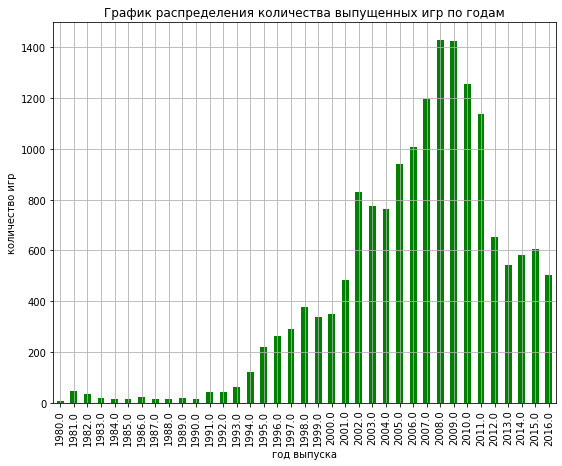

In [21]:
data['year_of_release'].value_counts().sort_index()\
.plot(kind='bar', grid=True, figsize=(9,7), color='g')
plt.title('График распределения количества выпущенных игр по годам')
plt.xlabel('год выпуска')
plt.ylabel('количество игр')
plt.show()

Подробный график распределения выпущенных игр по каждому году позволяет выявить интересные тенденции в индустрии разработки игр. По данным можно сделать вывод, что после 2000-х годов произошел резкий скачок в производстве игр. Содержательная часть игрового контента была создана именно с этого времени. Однако, стоит отметить, что начиная с 2008 года, мы наблюдаем снижение в количестве произведенных игр за год. Это может свидетельствовать о насыщении рынка и необходимости более тщательного подхода к разработке игровых проектов.

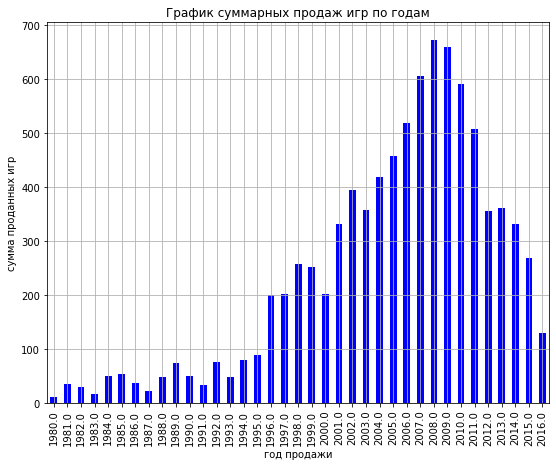

In [22]:
data.groupby('year_of_release')['total_sales'].agg('sum')\
.plot(kind='bar', figsize=(9,7), grid=True, color='b')
plt.title('График суммарных продаж игр по годам')
plt.xlabel('год продажи')
plt.ylabel('сумма проданных игр')
plt.show()

В последние годы также заметно снизились и совокупные объемы продаж. Рассмотрим, как изменялись продажи на разных платформах. Отоберем платформы с наибольшими общими объемами продаж и создадим график, отображающий их динамику по годам.

In [23]:
data.groupby('platform')['total_sales'].agg('sum').sort_values(ascending=False)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

По общему количеству продаж впереди идут следующие игровые платформы: Sony PlayStation 2, Xbox 360, Sony PlayStation 3 и Wii.

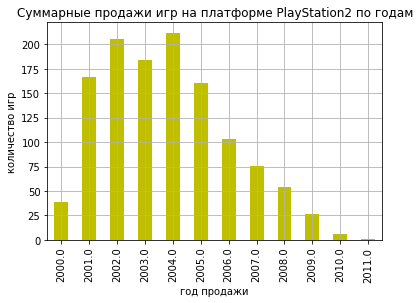

In [24]:
data.loc[data['platform'] == 'PS2'].groupby('year_of_release')['total_sales']\
.agg('sum').plot(kind='bar', color='y', grid=True)
plt.title('Суммарные продажи игр на платформе PlayStation2 по годам')
plt.xlabel('год продажи')
plt.ylabel('количество игр')
plt.show()

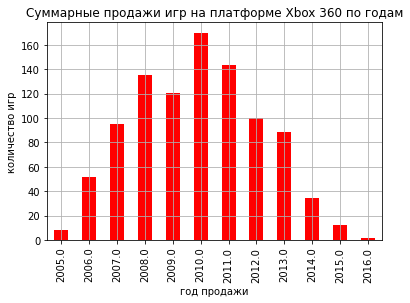

In [25]:
data.loc[data['platform'] == 'X360'].groupby('year_of_release')['total_sales']\
.agg('sum').plot(kind='bar', color='r', grid=True)
plt.title('Суммарные продажи игр на платформе Xbox 360 по годам')
plt.xlabel('год продажи')
plt.ylabel('количество игр')
plt.show()

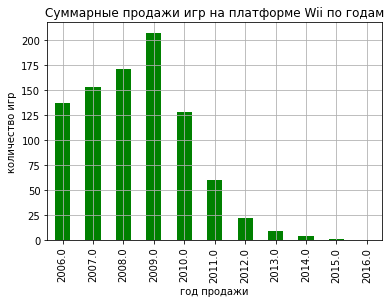

In [26]:
data.loc[data['platform'] == 'Wii'].groupby('year_of_release')['total_sales']\
.agg('sum').plot(kind='bar',color='g', grid=True)
plt.title('Суммарные продажи игр на платформе Wii по годам')
plt.xlabel('год продажи')
plt.ylabel('количество игр')
plt.show()

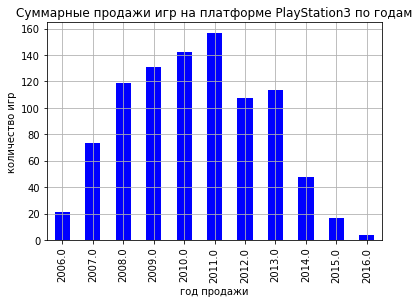

In [27]:
data.loc[data['platform'] == 'PS3'].groupby('year_of_release')['total_sales'].agg('sum')\
.plot(kind='bar',color='b', grid=True)
plt.title('Суммарные продажи игр на платформе PlayStation3 по годам')
plt.xlabel('год продажи')
plt.ylabel('количество игр')
plt.show()

По графикам наглядно видно, что каждая из рассмотренных платформ прочно удерживается на рынке в течение приблизительно 10 лет. Однако стоит отметить, что несмотря на их лидирующие позиции, продажи всех четырех платформ за последние несколько лет идут на спад.

Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ. Для проведения исследования мы будем использовать данные за последние пять лет, которые являются актуальным периодом.

In [28]:
new_data = data.query('year_of_release >= 2012')
new_data.pivot_table(index='platform', values='total_sales', aggfunc='sum').reset_index()\
.sort_values('total_sales', ascending=False)

,platform,total_sales
4,PS4,314.14
3,PS3,288.79
9,X360,236.54
0,3DS,194.61
10,XOne,159.32
8,WiiU,82.19
2,PC,62.65
6,PSV,49.18
7,Wii,35.37
1,DS,12.55


In [29]:
ps4_sales = new_data.loc[new_data['platform'] == 'PS4']\
.pivot_table(index='year_of_release',values='total_sales',aggfunc='sum').reset_index()                                                                                                                                                                                         
ps4_sales

,year_of_release,total_sales
0,2013.0,25.99
1,2014.0,100.00
2,2015.0,118.90
3,2016.0,69.25


In [30]:
x360_sales = new_data.loc[new_data['platform'] == 'X360']\
.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').reset_index()
x360_sales

,year_of_release,total_sales
0,2012.0,99.74
1,2013.0,88.58
2,2014.0,34.74
3,2015.0,11.96
4,2016.0,1.52


In [31]:
sales_3ds = new_data.loc[new_data['platform'] == '3DS']\
.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').reset_index()
sales_3ds

,year_of_release,total_sales
0,2012.0,51.36
1,2013.0,56.57
2,2014.0,43.76
3,2015.0,27.78
4,2016.0,15.14


In [32]:
ps3_sales = new_data.loc[new_data['platform'] == 'PS3']\
.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').reset_index()
ps3_sales

,year_of_release,total_sales
0,2012.0,107.36
1,2013.0,113.25
2,2014.0,47.76
3,2015.0,16.82
4,2016.0,3.60


In [33]:
xone_sales = new_data.loc[new_data['platform'] == 'XOne'].pivot_table(index='year_of_release',\
                                                                      values='total_sales', aggfunc='sum').reset_index()
xone_sales

,year_of_release,total_sales
0,2013.0,18.96
1,2014.0,54.07
2,2015.0,60.14
3,2016.0,26.15


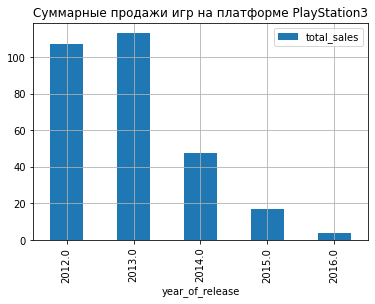

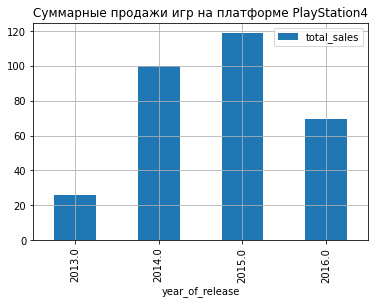

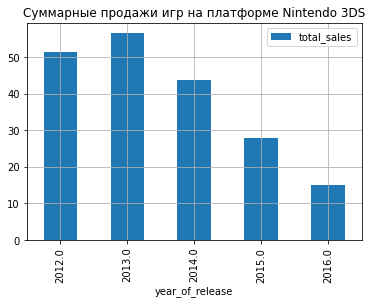

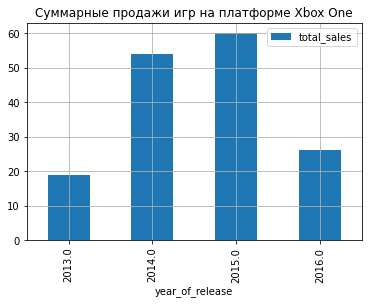

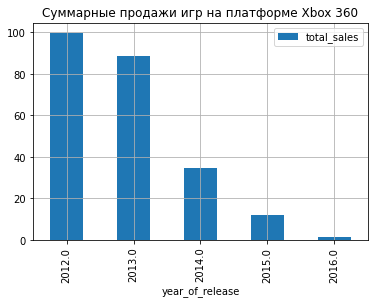

In [34]:
ps3_sales.plot(x='year_of_release', y='total_sales', grid=True, kind='bar')
plt.title('Суммарные продажи игр на платформе PlayStation3')
ps4_sales.plot(x='year_of_release', y='total_sales', grid=True, kind='bar')
plt.title('Суммарные продажи игр на платформе PlayStation4')
sales_3ds.plot(x='year_of_release', y='total_sales', grid=True, kind='bar')
plt.title('Суммарные продажи игр на платформе Nintendo 3DS')
xone_sales.plot(x='year_of_release', y='total_sales', grid=True, kind='bar')
plt.title('Суммарные продажи игр на платформе Xbox One')
x360_sales.plot(x='year_of_release', y='total_sales', grid=True, kind='bar')
plt.title('Суммарные продажи игр на платформе Xbox 360')
plt.show()

Мы проанализировали пять самых перспективных игровых платформ: PlayStation 4, PlayStation 3, Xbox One, Xbox 360 и Nintendo 3DS. За последние несколько лет наблюдается снижение продаж игр на данных платформах.

Сформируем диаграмму "ящик с усами" для обобщенных данных о мировых продажах видеоигр, разбивка которых произведена в соответствии с используемыми игровыми платформами.

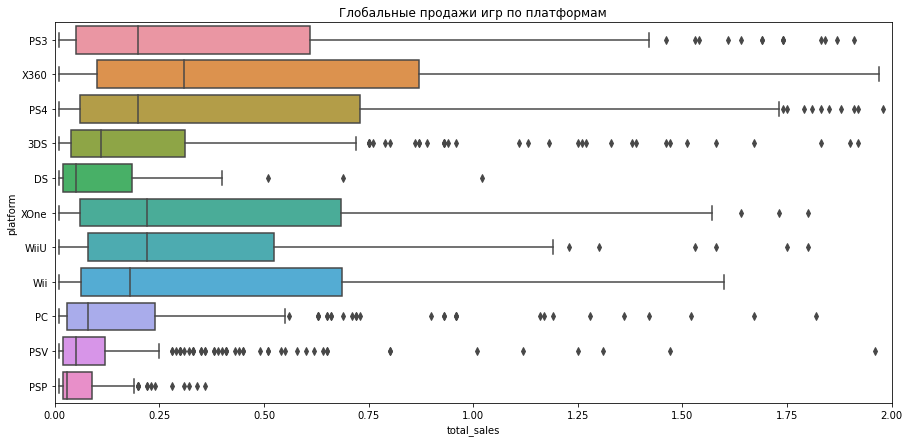

In [35]:
fig, ax = plt.subplots(figsize = (15,7))
sns.boxplot(data = new_data, x= 'total_sales', y = 'platform', orient = 'h')
plt.xlim(0,2)
plt.title('Глобальные продажи игр по платформам')
plt.show()

Анализируя график, можно сделать вывод, что наибольшим спросом пользуются игры, доступные для платформ Xbox 360, PlayStation 3 и PlayStation 4.

Давайте изучим, как отзывы пользователей и критиков влияют на продажи внутри одной известной платформы. Создадим диаграмму рассеяния и рассчитаем корреляцию между отзывами и объемами продаж. Для анализа примем платформу Sony PlayStation4 в качестве примера.

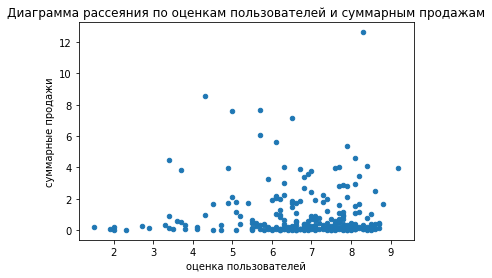

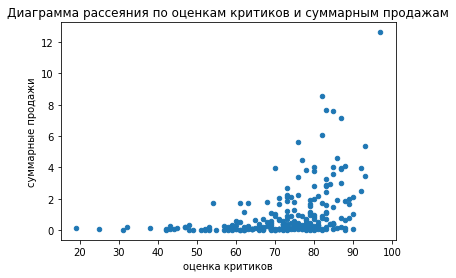

In [36]:
ps4 = new_data.loc[(new_data['platform'] == 'PS4') & (new_data['user_score'] >=0)\
                   & (new_data['critic_score'] >= 0)]
ps4.plot(kind= 'scatter', x='user_score', y = 'total_sales')
plt.xlabel('оценка пользователей')
plt.ylabel('суммарные продажи')
plt.title('Диаграмма рассеяния по оценкам пользователей и суммарным продажам')
ps4.plot(kind= 'scatter', x='critic_score', y = 'total_sales')
plt.xlabel('оценка критиков')
plt.ylabel('суммарные продажи')
plt.title('Диаграмма рассеяния по оценкам критиков и суммарным продажам')
plt.show()

Анализ графиков явно показывает, что продажи игр тесно связаны с их оценками, как от пользователей, так и от критиков. Однако можно заметить несколько выбросов, когда игры с невысокими значениями рейтинга все же имеют большие объемы продаж. Давайте более детально рассмотрим эту корреляцию.

In [37]:
ps4[['total_sales', 'user_score', 'critic_score']].corr()

,total_sales,user_score,critic_score
total_sales,1.000000,-0.033625,0.405895
user_score,-0.033625,1.000000,0.557654
critic_score,0.405895,0.557654,1.000000


Анализируя корреляцию данных, можно утверждать, что не существует прямой связи между отзывами пользователей и уровнем продаж - значение коэффициента корреляции является отрицательным. Однако, имеется позитивная зависимость между оценками критиков и объемом продаж - значение коэффициента корреляции превышает ноль.

Посмторим на другие платформы

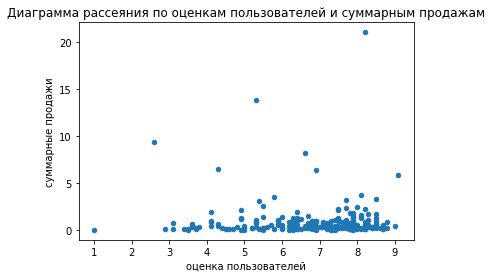

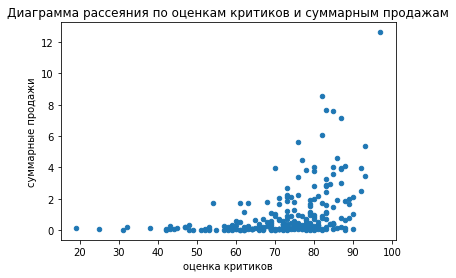

In [38]:
ps3 = new_data.loc[(new_data['platform'] == 'PS3') & (new_data['user_score'] >=0)\
                   & (new_data['critic_score'] >= 0)]
ps3.plot(kind= 'scatter', x='user_score', y = 'total_sales')
plt.xlabel('оценка пользователей')
plt.ylabel('суммарные продажи')
plt.title('Диаграмма рассеяния по оценкам пользователей и суммарным продажам')
ps4.plot(kind= 'scatter', x='critic_score', y = 'total_sales')
plt.xlabel('оценка критиков')
plt.ylabel('суммарные продажи')
plt.title('Диаграмма рассеяния по оценкам критиков и суммарным продажам')
plt.show()

In [39]:
ps3[['total_sales', 'user_score', 'critic_score']].corr()

,total_sales,user_score,critic_score
total_sales,1.000000,0.003227,0.331057
user_score,0.003227,1.000000,0.539456
critic_score,0.331057,0.539456,1.000000


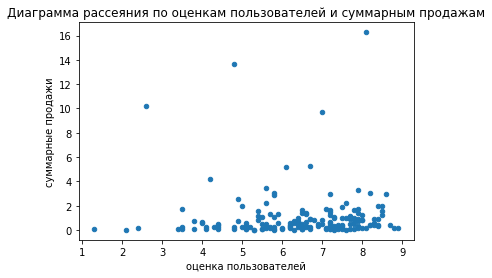

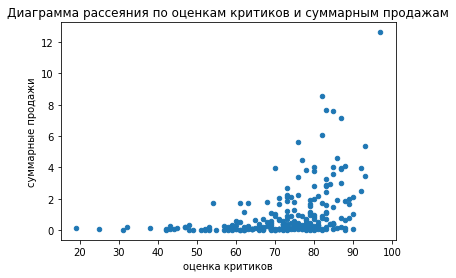

In [40]:
x360 = new_data.loc[(new_data['platform'] == 'X360') & (new_data['user_score'] >=0)\
                   & (new_data['critic_score'] >= 0)]
x360.plot(kind= 'scatter', x='user_score', y = 'total_sales')
plt.xlabel('оценка пользователей')
plt.ylabel('суммарные продажи')
plt.title('Диаграмма рассеяния по оценкам пользователей и суммарным продажам')
ps4.plot(kind= 'scatter', x='critic_score', y = 'total_sales')
plt.xlabel('оценка критиков')
plt.ylabel('суммарные продажи')
plt.title('Диаграмма рассеяния по оценкам критиков и суммарным продажам')
plt.show()

In [41]:
x360[['total_sales', 'user_score', 'critic_score']].corr()

,total_sales,user_score,critic_score
total_sales,1.000000,-0.002014,0.360573
user_score,-0.002014,1.000000,0.557352
critic_score,0.360573,0.557352,1.000000


Анализируя выводы по платформе PS4 с учетом двух других популярных платформ - PS3 и Xbox 360, мы можем заметить, что связь между продажами и оценками пользователей не так явно прослеживается, как в первом случае. Вместе с тем, становится очевидно, что связь между оценками критиков и объемом продаж в целом является прямопропорциональной.

Давайте рассмотрим общее разнообразие игр по их жанрам. Каковы характеристики самых прибыльных жанров? Есть ли жанры, которые привлекают внимание своими высокими или низкими объемами продаж?

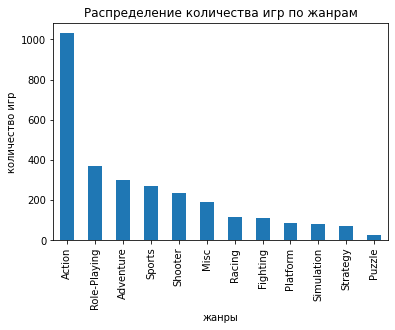

In [42]:
new_data.groupby('genre')['name'].agg('count').sort_values(ascending=False).plot(kind='bar')
plt.title('Распределение количества игр по жанрам')
plt.xlabel('жанры')
plt.ylabel('количество игр')
plt.show()

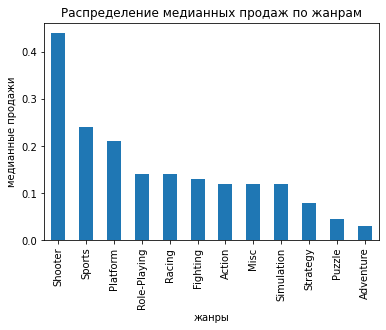

In [43]:
new_data.groupby('genre')['total_sales'].agg('median').sort_values(ascending=False).plot(kind='bar')
plt.title('Распределение медианных продаж по жанрам')
plt.xlabel('жанры')
plt.ylabel('медианные продажи')
plt.show()

В топе по количеству игр находятся экшн, RPG, приключенческие и спортивные симуляторы. Самыми малопопулярными являются головоломки.

Однако по продажам самыми популярными являются шутеры, спортивные, платформер и RPG.А самыми малопопулярными являются приключенческие игры.

<b>Вывод</b>

Изучив статистику игровой индустрии за последние пять лет, можно заметить, что даже у крупных производителей, таких как PlayStation, Xbox и Nintendo, как объемы продаж, так и количество выпускаемых игр существенно снизилось. Что касается жанров, опираясь на донные продаж то можем сделать вывод что пользователи отдают предпочтение играм в жанре шутер, в то время как приключенческие оказались наименее популярными.

## Составляем портрет пользователя каждого региона

### Самые популярные платформы (топ-5)

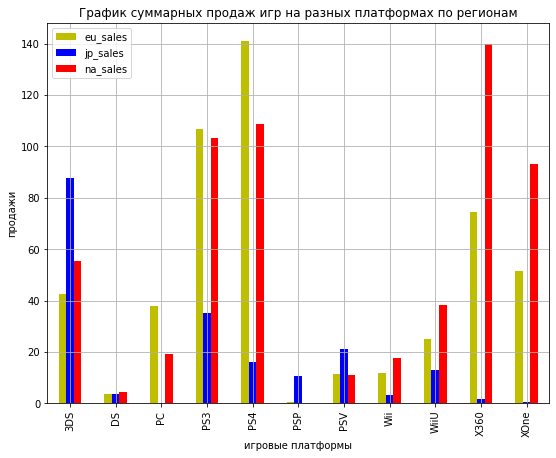

In [44]:
new_data.pivot_table(index='platform', values=['eu_sales', 'na_sales', 'jp_sales'],\
                     aggfunc='sum').plot(kind='bar', color=['y','b','r'], figsize=(9,7), grid=True)
plt.title('График суммарных продаж игр на разных платформах по регионам')
plt.xlabel('игровые платформы')
plt.ylabel('продажи')
plt.show()

Найдем пять самых популярных платформ в каждом регионе.



In [45]:
reg_na = new_data.groupby(by='platform').agg({'na_sales':'sum'}).reset_index()\
.sort_values(by='na_sales', ascending=False).head(5)
reg_na['percent'] = reg_na['na_sales'] / new_data['na_sales'].sum() * 100
reg_na

,platform,na_sales,percent
9,X360,140.05,23.698326
4,PS4,108.74,18.400257
3,PS3,103.38,17.493274
10,XOne,93.12,15.757145
0,3DS,55.31,9.359189


In [46]:
reg_eu = new_data.groupby(by='platform').agg({'eu_sales':'sum'}).reset_index()\
.sort_values(by='eu_sales', ascending=False).head(5)
reg_eu['percent'] = reg_eu['eu_sales'] / new_data['eu_sales'].sum() * 100
reg_eu

,platform,eu_sales,percent
4,PS4,141.09,27.838286
3,PS3,106.86,21.084409
9,X360,74.52,14.703445
10,XOne,51.59,10.179156
0,3DS,42.64,8.413243


In [47]:
reg_jp = new_data.groupby(by='platform').agg({'jp_sales':'sum'}).reset_index()\
.sort_values(by='jp_sales', ascending=False).head(5)
reg_jp['percent'] = reg_jp['jp_sales'] / new_data['jp_sales'].sum() * 100
reg_jp

,platform,jp_sales,percent
0,3DS,87.79,45.586250
3,PS3,35.29,18.324852
6,PSV,21.04,10.925330
4,PS4,15.96,8.287465
8,WiiU,13.01,6.755634


Если обобщить полученную информацию то мы видим что в Соединенных Штатах самой распространенной является американская консоль Xbox 360, в то время как в Европе игроки предпочитают японские Playstation 4 и 3. А в Японии почти половина всех проданных игр приходится на свою собственную платформу Nintendo 3DS.

### Самые популярные жанры (топ-5)

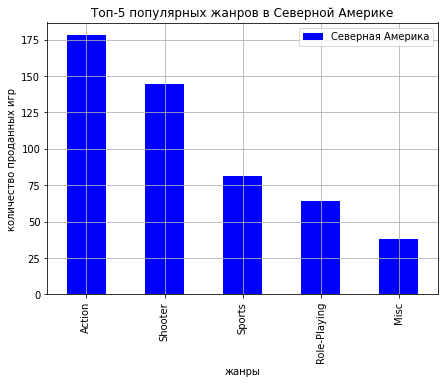

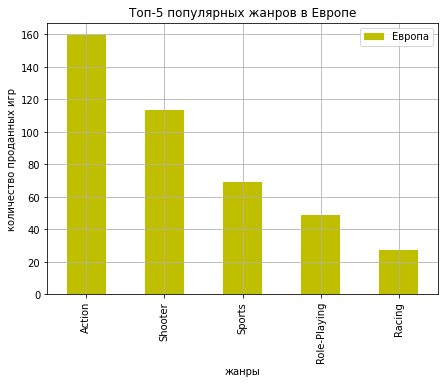

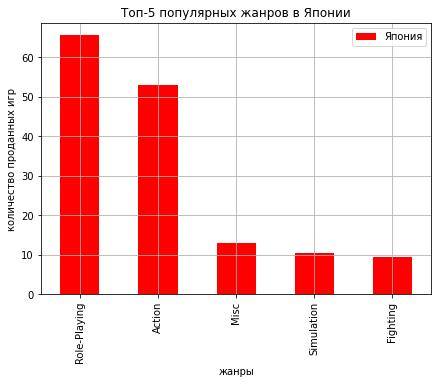

In [48]:
new_data.pivot_table(index='genre', values='na_sales',aggfunc='sum').reset_index()\
.sort_values(by='na_sales',ascending=False).head(5)\
.plot(x='genre', y='na_sales', kind='bar', grid=True, color='b', label='Северная Америка', figsize=(7,5))
plt.title('Топ-5 популярных жанров в Северной Америке')
plt.xlabel('жанры')
plt.ylabel('количество проданных игр')

new_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum').reset_index()\
.sort_values(by='eu_sales', ascending=False).head(5)\
.plot(x='genre', y='eu_sales', kind='bar', grid=True, color='y', label='Европа', figsize=(7,5))
plt.title('Топ-5 популярных жанров в Европе')
plt.xlabel('жанры')
plt.ylabel('количество проданных игр')

new_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum').reset_index()\
.sort_values(by='jp_sales', ascending=False).head(5)\
.plot(x='genre', y='jp_sales', kind='bar', grid=True, color='r', label='Япония', figsize=(7,5))
plt.title('Топ-5 популярных жанров в Японии')
plt.xlabel('жанры')
plt.ylabel('количество проданных игр')
plt.show()

Можем отметить, что в Японии наиболее популярны ролевые игры, в то время как в Северной Америке и Европе предпочтение отдается экшн играм. Возможно, это связано с культурными особенностями и предпочтениями игроков в разных регионах. В целом ролевые и экшн игры обладают сходством и часто могут сочетать в себе элементы нескольких жанров. Давайте рассмотрим популярные ролевые игры в Японии для лучшего понимания этой тенденции.

In [49]:
new_data[new_data['genre'] == 'Role-Playing'].sort_values(by='jp_sales', ascending=False)['name'].head(10)

33                            Pokemon X/Pokemon Y
385                              Monster Hunter 4
412                     Yokai Watch 2 Ganso/Honke
83                Pokemon Black 2/Pokemon White 2
47      Pokemon Omega Ruby/Pokemon Alpha Sapphire
563                        Yokai Watch 2 Shinuchi
312                     Monster Hunter 4 Ultimate
108                              Pokemon Sun/Moon
1244                             Puzzle & Dragons
798                                   Yokai Watch
Name: name, dtype: object

Сразу бросается в глаза, что большинство представленных игр, таких как Pokemon и Yokai Watch, являются японскими продуктами, и, следовательно, наиболее популярны именно на своем собственном рынке.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Давайте проанализируем, какие игры с какими оценками более популярны в различных местах.

In [50]:
region_rating = new_data[new_data['rating'] != 'Unknown']\
.pivot_table(index='rating', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').reset_index()
region_rating

,rating,eu_sales,jp_sales,na_sales
0,E,113.03,28.33,114.37
1,E10+,55.37,8.19,75.70
2,M,193.96,21.20,231.57
3,T,52.96,26.02,66.02


E - everyone(для всех возрастов)
E10+ - everyone 10 and older(для всех старше 10)
M - mature (для лиц 17 лет и старше)
T - Teen (для подростков 13-19 лет)

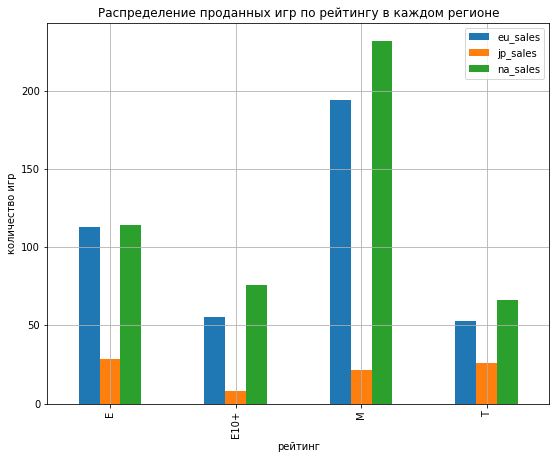

In [51]:
region_rating.plot(figsize=(9,7), grid=True, kind='bar', x='rating')
plt.title('Распределение проданных игр по рейтингу в каждом регионе')
plt.xlabel('рейтинг')
plt.ylabel('количество игр')
plt.show()

[]

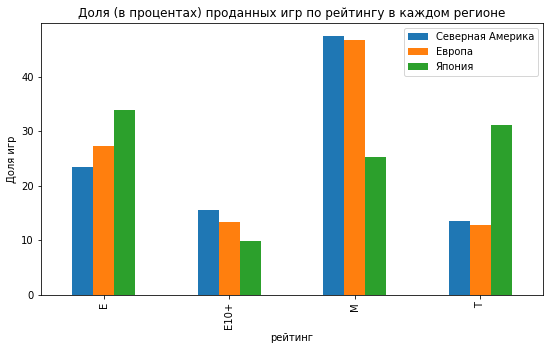

In [52]:
region_rating['percent_na'] = region_rating['na_sales'] / region_rating['na_sales'].sum() *100
region_rating['percent_eu'] = region_rating['eu_sales'] / region_rating['eu_sales'].sum() *100
region_rating['percent_jp'] = region_rating['jp_sales'] / region_rating['jp_sales'].sum() *100
region_rating.plot(kind='bar', x='rating', y=['percent_na', 'percent_eu', 'percent_jp'], figsize=(9,5),\
                   label=['Северная Америка', 'Европа', 'Япония'])
plt.title('Доля (в процентах) проданных игр по рейтингу в каждом регионе')
plt.xlabel('рейтинг')
plt.ylabel('Доля игр')
plt.plot()

<b>Вывод</b>

Диаграмма распределения продаж игр по жанрам наглядно демонстрирует, что в Европе и Северной Америке продажи по рейтингу очень похожи между собой. Здесь основные продажи игр приходятся на категории "17+" и "Для всех". В Японии же продажи по разным рейтингам примерно одинаковы, но немного больше игр продаётся с рейтингом "10+". Анализируя данные о популярности жанров в различных регионах, замечаем, что в Европе и Америке предпочитают экшн-игры, в то время как в Японии предпочтение отдается ролевым играм. Что касается игровых платформ, в США наиболее востребованной является Xbox 360, в Европе играют на Playstation 4 и 3, а в Японии большинство игр выходит для Nintendo 3DS.

## Проверяем гипотезы

Давайте выразим основную гипотезу (H0), которая заключается в том, что средние пользовательские оценки для платформ Xbox One и PC одинаковы. Следовательно, альтернативная гипотеза (H1) будет заключаться в том, что средние оценки пользователей для платформ Xbox One и PC различаются.

In [53]:
xbox = new_data[(new_data['platform'] == 'XOne') & (new_data['user_score'] >= 0)]['user_score']
pc = new_data[(new_data['platform'] == 'PC') & (new_data['user_score'] >= 0)]['user_score']

Рассчитаем разброс выборок.

In [54]:
xbox.var()

1.9069968429360695

In [55]:
pc.var()

2.770443997158418

Проверяем нулевую гипотезу.

In [56]:
result = st.ttest_ind(xbox, pc, equal_var=False)
alpha = .05
print(result.pvalue)
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


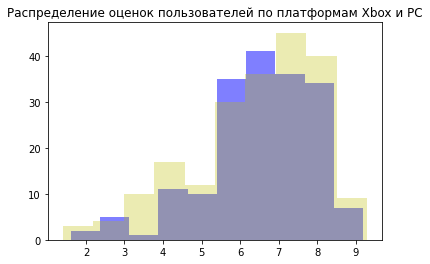

In [57]:
plt.hist(xbox, color='b', alpha=0.5)
plt.hist(pc, alpha=0.3, color='y')
plt.title('Распределение оценок пользователей по платформам Xbox и PC')
plt.show()

In [58]:
xbox.mean()

6.521428571428572

In [59]:
pc.mean()

6.4286407766990274

После проведения проверки гипотезы можно утверждать, что средние пользовательские оценки для платформ Xbox One и PC одинаковы. Диаграмма и средние значения выборок также показывают, что данные очень похожи друг на друга.

Произведем проверку нулевой гипотезы (H0), согласно которой средние пользовательские рейтинги жанров Action (экшен-игры) и Sports (спортивные соревнования) равны. Как альтернативу, предположим, что средние пользовательские рейтинги указанных жанров отличаются.

In [60]:
action = new_data[(new_data['genre'] == 'Action') & (new_data['user_score'] >= 0)]['user_score']
sports = new_data[(new_data['genre'] == 'Sports') & (new_data['user_score'] >= 0)]['user_score']

In [61]:
action.var()

1.8890840494348111

In [62]:
sports.var()

3.022890298704732

In [63]:
results = st.ttest_ind(action, sports, equal_var=False)
alpha = .05
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

4.24307776572644e-20
Отвергаем нулевую гипотезу


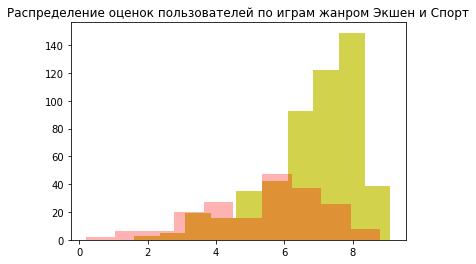

In [64]:
plt.hist(action, color='y', alpha=0.7)
plt.hist(sports, alpha=0.3, color='r')
plt.title('Распределение оценок пользователей по играм жанром Экшен и Спорт')
plt.show()

In [65]:
action.mean()

6.825047801147227

In [66]:
sports.mean()

5.455897435897437

<b>Вывод</b>

Проведя анализ двух основных гипотез, можно заключить, что средние пользовательские оценки игр для платформ Xbox One и PC совпадают, а оценки игр в жанрах экшен и спорт отличаются.

## Общий вывод

Анализируя результаты исследования, можно сделать следующие выводы:

- Большинство игр было выпущено в период с 2000 по 2010 год.

- В последние годы как объемы продаж игр, так и их количество значительно сократились. Этот десятилетний период с 2000-х до 2010-х годов можно назвать "временем расцвета игровой индустрии", когда с развитием технологий появлялись новые игровые платформы, каждая из которых стремилась привлечь свою аудиторию, выпуская все новые и новые игры. В последние годы количество выпускаемых игр снизилось, но, возможно, они стали качественнее, и новые релизы выходят не так часто, как раньше.

- Для более точного определения причин снижения объемов производства игр необходимо провести дополнительные исследования. Однако можно предположить, что это может быть связано с переходом пользователей на мобильные приложения, часто предлагаемые бесплатно. Также разработка игр сейчас требует больше времени, увеличилось качество графики и самой игры. Время, необходимое для прохождения игры, с годами увеличивается, потому что современные игры могут потребовать больше времени для завершения, что может быть связано с снижением объемов продаж.

- За последние пять лет самыми продаваемыми игровыми платформами оказались Sony PlayStation 4 и 3, Xbox 360 и Nintendo 3DS.

- В отношении жанров лидерство по количеству удерживают игры в жанрах экшен, ролевых игр, спортивных симуляторов и шутеров, а по объемам продаж шутеры, спортивные, платформеры и ролевые. Наименее популярными оказались игры-головоломки по количеству и приключенческие по продажам.

- В Северной Америке примерно четверть всех продаж игр приходится на игры для платформы Xbox 360 от корпорации Microsoft. В Европе более популярной оказалась японская Sony PlayStation 4. В то же время в Японии больше всего спроса на игры для портативной консоли Nintendo 3DS, которая также производится в этой стране.

- Проверка гипотез привела к выводу, что пользовательские рейтинги для платформ Xbox One и ПК примерно равны между собой, в то время как средние пользовательские рейтинги экшен и спортивных игр разнятся.

- Также было исследовано, влияют ли рейтинги пользователей и критиков на объемы продаж. Оказалось, что пользовательские оценки не оказывают значительного влияния на продажи, что подтверждается как графическими данными, так и корреляционным анализом. Однако игроки проявляют больше доверия к рейтингам критиков и предпочитают покупать игры с более высокими оценками от них.

<b>Выоды по региональные особенностям:</b>

<b><i>Северная Америка</i></b>

В Северной Америке наиболее высокие продажи (четверть от общего объема) обеспечивает игровая платформа Xbox 360, принадлежащая Microsoft. Второе, третье и четвертое места занимают PlayStation4, PlayStation3 и Xbox One со схожими долями рынка. Самыми популярными жанрами являются экшен, стрелялки и спортивные игры. Лидируют продажи игр с рейтингом "17+" и "Для всех возрастов".

<b><i>Европа</i></b>

В Европе предпочтение отдается японским платформам PlayStation4 и PlayStation3, с американской Xbox 360 на третьем месте. По жанрам предпочтения европейцев совпадают с американскими геймерами - экшен, стрелялки и спортивные игры наиболее востребованы. Основной объем продаж приходится на игры с рейтингом "17+" и "Для всех возрастов".

<b><i>Япония</i></b>

В Японии наибольшую популярность имеют местные платформы. Почти половина всех проданных игр приходится на Nintendo 3DS, затем следуют Sony PlayStation3 и PlayStation Vita. Американские Xbox не пользуются большой популярностью среди японцев. В жанровом плане ролевые игры и экшены лидируют с большим отрывом. Продажи по жанрам распределены примерно равномерно, с меньшей долей выпускаемых игр для возрастной категории "10+" и старше.
